<a href="https://colab.research.google.com/github/secutron/RunTime/blob/master/GPipe0PP_SloMo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### View - compute_texture_map

In [ ]:
_ = !sudo apt update
_ = !sudo wget https://github.com/mmatl/travis_debs/raw/master/xenial/mesa_18.3.3-0.deb
_ = !sudo dpkg -i ./mesa_18.3.3-0.deb || true
_ = !sudo apt install -f
_ = !git clone https://github.com/mmatl/pyopengl.git
_ = !pip install ./pyopengl
_ = !pip install pyrender

In [ ]:
import os, sys, cv2
from os.path import join
os.environ["PYOPENGL_PLATFORM"] = "osmesa"
import numpy as np
import pickle
import trimesh
import pyrender
import matplotlib.pyplot as plt

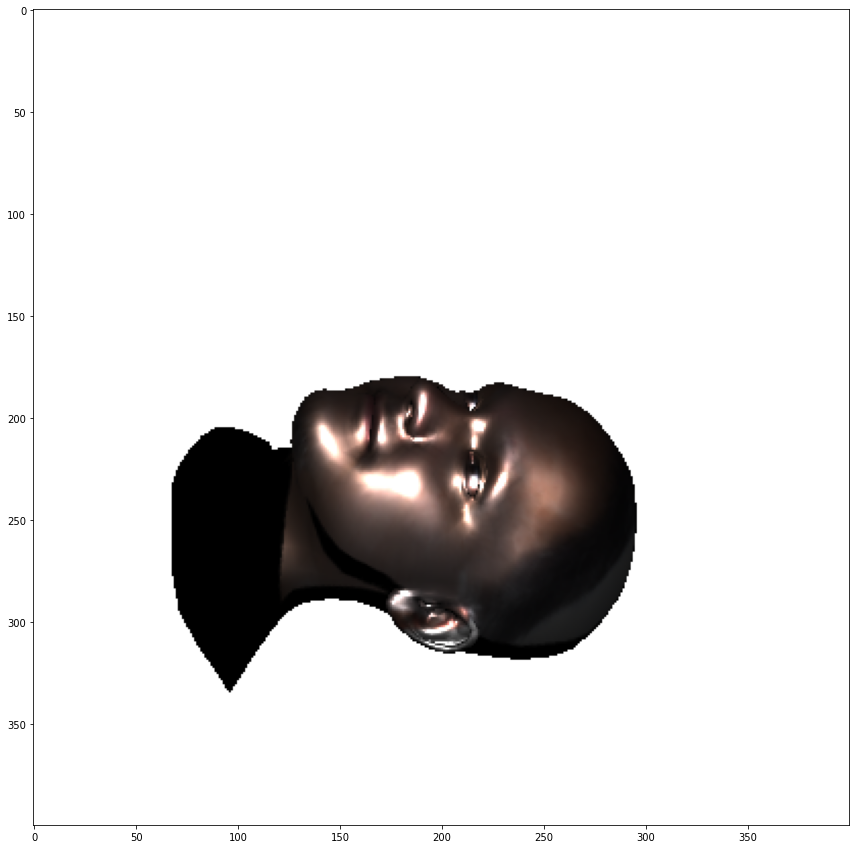

In [ ]:
#fuze_trimesh = trimesh.load('/content/drive/My Drive/GTask/VOCA/pyrender/examples/models/fuze.obj')
fuze_trimesh = trimesh.load('/content/drive/My Drive/000TexTest/00091.obj')

mesh = pyrender.Mesh.from_trimesh(fuze_trimesh)
scene = pyrender.Scene()
scene.add(mesh)

camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0)
s = np.sqrt(2)/2
camera_pose = np.array([
    [0.0, -s,   s,   0.3],
    [1.0,  0.0, 0.0, 0.0],
    [0.0,  s,   s,   0.35],
    [0.0,  0.0, 0.0, 1.0],
])
scene.add(camera, pose=camera_pose)
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                            innerConeAngle=np.pi/16.0,
                            outerConeAngle=np.pi/6.0)
scene.add(light, pose=camera_pose)

# Use OffscreenRenderer to get image perspectives.
r = pyrender.OffscreenRenderer(400, 400)
color, depth = r.render(scene)


fig = plt.figure(figsize=(30, 15))

plt.imshow(color)

In [ ]:
_ = !git clone https://github.com/MPI-IS/mesh.git MESH
%cd /content/MESH
!make all
!meshviewer view "/content/drive/My Drive/GTask/MESH/data/unittest/sphere.obj"

/content/MESH
----- [ mesh_package ] Installing with the interpreter /usr/local/bin/python (version 3.6.9)
     |████████████████████████████████| 798kB 2.8MB/s 
     |████████████████████████████████| 14.5MB 238kB/s 
     |████████████████████████████████| 11.5MB 54.6MB/s 
     |████████████████████████████████| 25.9MB 118kB/s 
     |████████████████████████████████| 2.4MB 52.4MB/s 
     |████████████████████████████████| 2.2MB 52.8MB/s 
Requirement already up-to-date: pyzmq in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 7)) (19.0.2)
     |████████████████████████████████| 276kB 56.6MB/s 
     |████████████████████████████████| 43.7MB 69kB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=5c2bd0e97edfe3d1e675ecbe4f326426861b0b8e7a78eaa4bf1769d1705528e9
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built pyyaml
ERROR: tensorflow 2.3.0 has

In [ ]:
# 여기 런타임

%cd /content/drive/My Drive/GTask/VOCA/FLAME

/content/drive/My Drive/GTask/VOCA/FLAME


*** hkim1


ValueError: ignored

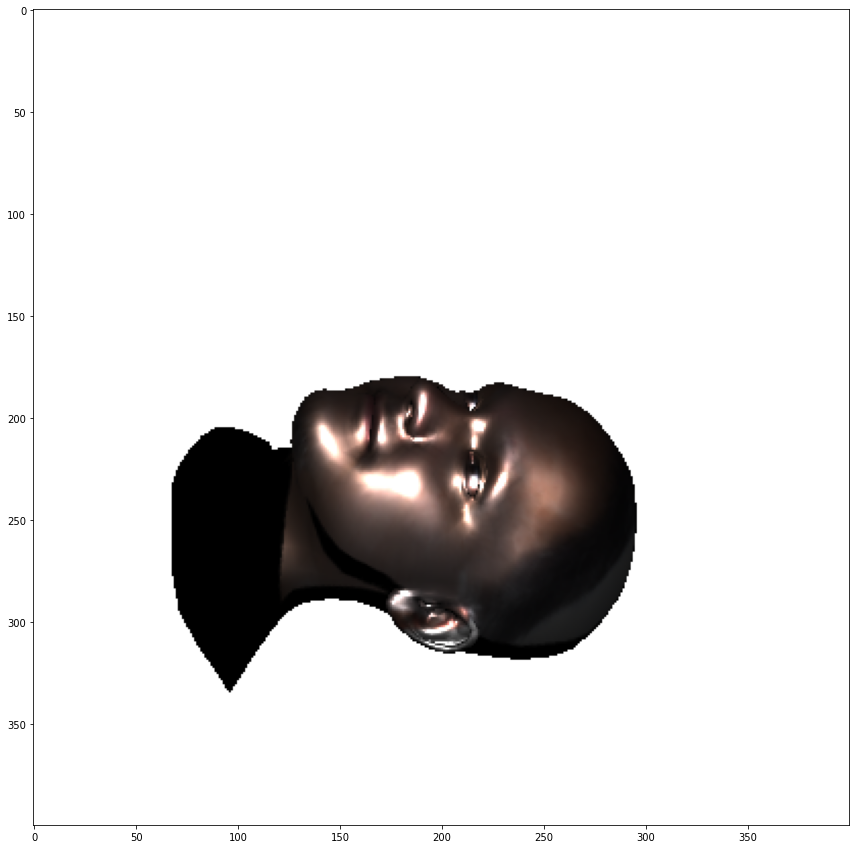

In [ ]:
import os
import cv2
import sys
import trimesh
import argparse
import numpy as np
from psbody.mesh import Mesh
from psbody.mesh.meshviewer import MeshViewer
#from utils.project_on_mesh import compute_texture_map
import matplotlib.pyplot as plt
#from os.path import join
#os.environ["PYOPENGL_PLATFORM"] = "osmesa"
import pickle
import trimesh
import pyrender

def get_unit_factor(unit):
    if unit == 'mm':
        return 1000.0
    elif unit == 'cm':
        return 100.0
    elif unit == 'm':
        return 1.0
    else:
        raise ValueError('Unit not supported')


fuze_trimesh = trimesh.load('/content/drive/My Drive/000TexTest/00091.obj')

mesh = pyrender.Mesh.from_trimesh(fuze_trimesh)
scene = pyrender.Scene()
scene.add(mesh)

camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0)
s = np.sqrt(2)/2
camera_pose = np.array([
    [0.0, -s,   s,   0.3],
    [1.0,  0.0, 0.0, 0.0],
    [0.0,  s,   s,   0.35],
    [0.0,  0.0, 0.0, 1.0],
])
scene.add(camera, pose=camera_pose)
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                            innerConeAngle=np.pi/16.0,
                            outerConeAngle=np.pi/6.0)
scene.add(light, pose=camera_pose)

# Use OffscreenRenderer to get image perspectives.
r = pyrender.OffscreenRenderer(400, 400)
color, depth = r.render(scene)


fig = plt.figure(figsize=(30, 15))

plt.imshow(color)





#mesh = Mesh(filename="/content/drive/My Drive/animation_output/meshes/00000.obj")
mesh = Mesh(filename="/content/drive/My Drive/000TexTest/hkimcrop.obj")
#my_trimesh = trimesh.load('/content/drive/My Drive/000TexTest/hkimcrop.obj')

trim = trimesh.load("/content/drive/My Drive/000TexTest/hkimcrop.obj")


rot=np.zeros(3)
v_colors=None
errors=None
error_unit='m'
min_dist_in_mm=0.0
max_dist_in_mm=3.0
z_offset=0

#center = np.mean(sequence_vertices[0], axis=0)
t_center = np.mean(mesh.v, axis=0)


camera_params = {'c': np.array([400, 400]),
                  'k': np.array([-0.19816071, 0.92822711, 0, 0, 0]),
                  'f': np.array([4754.97941935 / 2, 4754.97941935 / 2])}

camera_params = {'c': np.array([400, 400]),
                  'k': np.array([-0.19816071, 0.92822711, 0, 0, 0]),
                  'f': np.array([4754.97941935 / 2, 4754.97941935 / 2])}

frustum = {'near': 0.01, 'far': 3.0, 'height': 800, 'width': 800}

mesh_copy = Mesh(mesh.v, mesh.f)
mesh_copy.v[:] = cv2.Rodrigues(rot)[0].dot((mesh_copy.v-t_center).T).T+t_center

trim.vertices = mesh_copy.v

print('*** hkim1')

if errors is not None:
    intensity = 0.5
    unit_factor = get_unit_factor('mm')/get_unit_factor(error_unit)
    errors = unit_factor*errors

    norm = mpl.colors.Normalize(vmin=min_dist_in_mm, vmax=max_dist_in_mm)
    cmap = cm.get_cmap(name='jet')
    colormapper = cm.ScalarMappable(norm=norm, cmap=cmap)
    rgba_per_v = colormapper.to_rgba(errors)
    rgb_per_v = rgba_per_v[:, 0:3]
elif v_colors is not None:
    intensity = 0.5
    rgb_per_v = v_colors
else:
    intensity = 1.5
    rgb_per_v = None

tri_mesh = trim #trimesh.Trimesh(vertices=mesh_copy.v, faces=mesh_copy.f, vertex_colors=rgb_per_v)
render_mesh = pyrender.Mesh.from_trimesh(tri_mesh, smooth=True)

#render_mesh = pyrender.Mesh.from_trimesh(my_trimesh, smooth=True)

scene = pyrender.Scene(ambient_light=[.2, .2, .2], bg_color=[255, 255, 255])
camera = pyrender.IntrinsicsCamera(fx=camera_params['f'][0],
                                  fy=camera_params['f'][1],
                                  cx=camera_params['c'][0],
                                  cy=camera_params['c'][1],
                                  znear=frustum['near'],
                                  zfar=frustum['far'])

scene.add(render_mesh, pose=np.eye(4))

camera_pose = np.eye(4)
camera_pose[:3,3] = np.array([0, 0, 1.0-z_offset])
scene.add(camera, pose=[[1, 0, 0, 0],
                        [0, 1, 0, 0],
                        [0, 0, 1, 1],
                        [0, 0, 0, 1]])

angle = np.pi / 6.0
pos = camera_pose[:3,3]
light_color = np.array([1., 1., 1.])
light = pyrender.PointLight(color=light_color, intensity=intensity)

light_pose = np.eye(4)
light_pose[:3,3] = pos
scene.add(light, pose=light_pose.copy())

light_pose[:3,3] = cv2.Rodrigues(np.array([angle, 0, 0]))[0].dot(pos)
scene.add(light, pose=light_pose.copy())

light_pose[:3,3] =  cv2.Rodrigues(np.array([-angle, 0, 0]))[0].dot(pos)
scene.add(light, pose=light_pose.copy())

light_pose[:3,3] = cv2.Rodrigues(np.array([0, -angle, 0]))[0].dot(pos)
scene.add(light, pose=light_pose.copy())

light_pose[:3,3] = cv2.Rodrigues(np.array([0, angle, 0]))[0].dot(pos)
scene.add(light, pose=light_pose.copy())

flags = pyrender.RenderFlags.SKIP_CULL_FACES
try:
    r = pyrender.OffscreenRenderer(viewport_width=frustum['width'], viewport_height=frustum['height'])
    color, _ = r.render(scene, flags=flags)
except:
    print('pyrender: Failed rendering frame')
    color = np.zeros((frustum['height'], frustum['width'], 3), dtype='uint8')


fig = plt.figure(figsize=(10, 5))
plt.imshow((color *255).astype(np.uint8)) # (out * 255).astype(np.uint8)
